# Práctico 2 Procesamiento de Imágenes


***

### Dependencias e inclusión de librerías

In [1]:
import imageio
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import cm

# Ejercicio 1

## Ejercicio 1.1  
Podríamos llamar alpha al coeficiente de luminancia (si es menor que uno, baja la luminancia, y viceversa), y beta al coeficiente de saturación (si es menor que uno baja la saturación, y viceversa). El workflow a implementar consiste en los siguientes pasos:  
1. Normalizar los valores de RGB del pixel  
2. RGB -> YIQ (utilizando la segunda matriz)  
3. Y’ := aY;
4. I’ := bI;   Q’ := bQ;  
5. Chequear que Y’ <= 1 (para que no se vaya de rango)  
6. Chequear -0.5957 < I’ < 0.5957  y  -0.5226 < Q’ < 0.5226  
7. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)  
8. Convertir R’G’B’ a bytes y graficar el pixel  

### 0. Lectura de imagen

In [3]:
COLAB = True
if (COLAB):
  from google.colab import files
  uploaded = files.upload()

Saving argentina_topo.jpg to argentina_topo.jpg


In [ ]:
im = imageio.imread('koala.jpg')
print("Alto: ",im.shape[0])
print("Ancho: ",im.shape[1])
print("Profundidad: ",im.shape[2])

Alto:  768
Ancho:  1024
Profundidad:  3


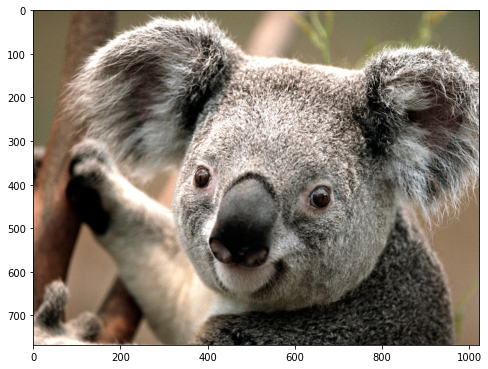

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

### 1. Normalizar los valores de RGB del pixel 

In [ ]:
im_np = np.asarray(im)

In [ ]:
im_np = im_np/256.

### 2. RGB -> YIQ (utilizando la segunda matriz) 

In [ ]:
RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                          [ 0.595716, -0.274453, -0.321263], 
                          [ 0.211456, -0.522591, 0.311135]])

YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                          [1, -0.2721, -0.6474], 
                          [1, -1.1070, 1.7046]])

In [ ]:
im_yiq =  np.copy(im_np)
for i in range(len(im_np)):
    for j in range(len(im_np[0])):
        im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(im_np[i][j])

#im_yiq = RGB_2_YIQ_MATRIX.dot(im_np)

In [ ]:
print(im_yiq.shape)

(768, 1024, 3)


### 3. Aplicar las siguientes transformaciones: Y’ := aY;  I’ := bI; Q’ := bQ;  

In [ ]:
def transformation(image,alpha,beta):
    
    image_transform = np.copy(image)
    
    image_transform[:,:,0] *= alpha
    image_transform[:,:,1] *= beta
    image_transform[:,:,2] *= beta
    
    image_transform[:,:,0][image_transform[:,:,0] > 1] = 1.
    image_transform[:,:,1][image_transform[:,:,1] < -0.5957] = -0.5957
    image_transform[:,:,1][image_transform[:,:,1] > 0.5957] = 0.5957
    image_transform[:,:,2][image_transform[:,:,2] < -0.5226] = -0.5226
    image_transform[:,:,2][image_transform[:,:,2] > 0.5226] = 0.5226
    
    return image_transform

### 4. Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)

In [ ]:
def yiq2rgb (im_transf):
  image_rgb =  np.copy(im_transf)
  for i in range(len(im_transf)):
      for j in range(len(im_transf[0])):
          image_rgb[i][j] = YIQ_2_RGB_MATRIX.dot(im_transf[i][j])
  return image_rgb

### Aplicación de transformación

In [ ]:
alpha = 1 #@param {type:"slider", min:0.1, max:2, step:0.1}
beta = 1.8 #@param {type:"slider", min:0.1, max:2, step:0.1}

In [ ]:
im_transf = transformation(im_yiq, alpha, beta)
image_rgb = yiq2rgb(im_transf)

### 5. Graficar el resultado

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


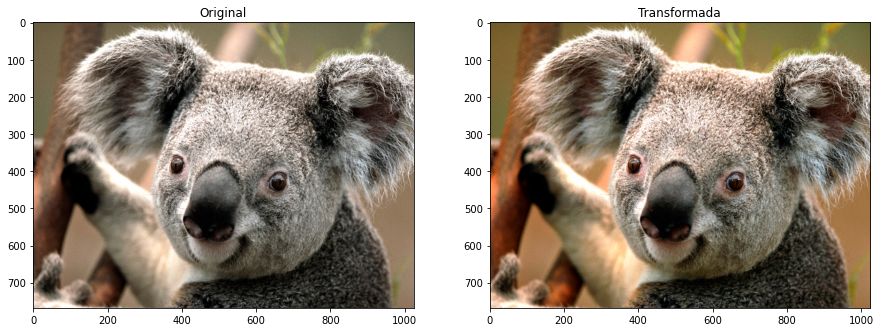

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))

ax1.set_title('Original')
ax1.imshow(im)

ax2.set_title('Transformada')
ax2.imshow(image_rgb)

### 6. Barrido de coeficientes

In [ ]:
alpha_arr = [0.1,0.5,1.,1.5,2.]
beta_arr  = [1.,1.,1.,1.,1.]
im_transf = []
for i in range(len(alpha_arr)):
  im_transf.append(yiq2rgb(transformation(im_yiq, alpha_arr[i], beta_arr[i])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


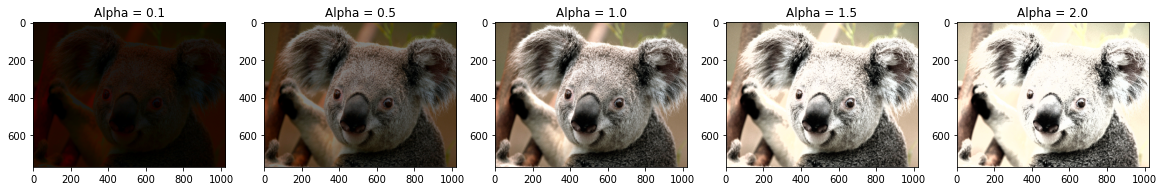

In [ ]:
fig, axs = plt.subplots(1, 5,figsize=(20,20))

for i in range(len(alpha_arr)):
  axs[i].imshow(im_transf[i])
  axs[i].set_title(f"Alpha = {alpha_arr[i]}")

In [ ]:
beta_arr = [0.1,0.5,1.,1.5,2.]
alpha_arr  = [1.,1.,1.,1.,1.]
im_transf = []
for i in range(len(beta_arr)):
  im_transf.append(yiq2rgb(transformation(im_yiq, alpha_arr[i], beta_arr[i])))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


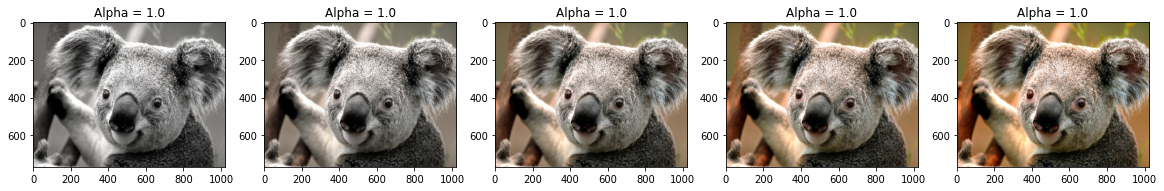

In [ ]:
fig, axs = plt.subplots(1, 5,figsize=(20,20))

for i in range(len(beta_arr)):
  axs[i].imshow(im_transf[i])
  axs[i].set_title(f"Beta = {beta_arr[i]}")

### Conclusión
Variando los coeficientes que afectan el canal Y podemos manejar la luminancia de la imagen de manera independiente, cosa que no puede realizarse en el espacio cromático RGB. Como vimos en el teórico, la visión es muy sensible a la luminancia, por lo que es muy importante tener un espacio cromático como el YIQ.

## Ejercicio 2  
Utilizar paletas de colores para representar imágenes.

In [4]:
im = imageio.imread('argentina_topo.jpg')
print("Alto: ",im.shape[0])
print("Ancho: ",im.shape[1])
print("Profundidad: ",im.shape[2])

Alto:  2153
Ancho:  1600
Profundidad:  3


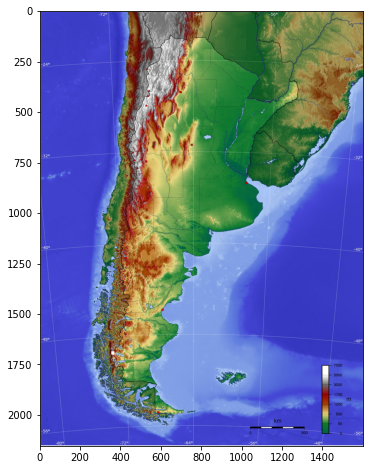

In [5]:
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

Text(0.5, 1.0, 'OrRd')

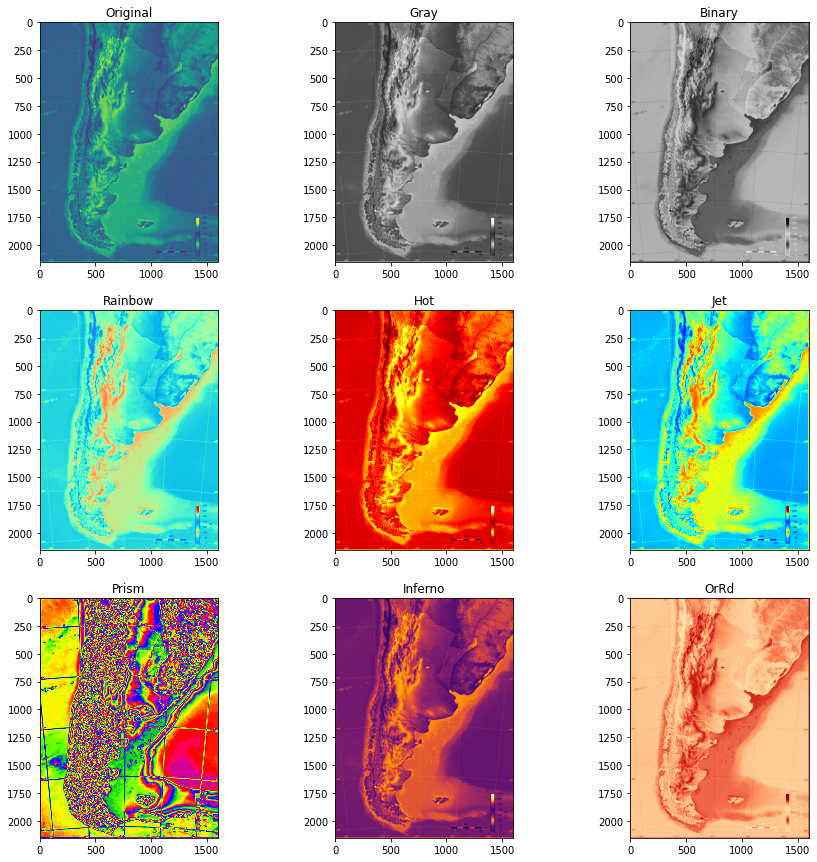

In [8]:
im = np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

fig, axs = plt.subplots(3,3)
fig.set_size_inches(15,15)

plt.subplot(3,3,1)
plt.imshow(im)
plt.title("Original")

plt.subplot(3,3,2)
plt.imshow(im, cmap='gray')
plt.title("Gray")

plt.subplot(3,3,3)
plt.imshow(im, cmap='binary')
plt.title("Binary")

plt.subplot(3,3,4)
plt.imshow(im, cmap='rainbow')
plt.title("Rainbow")

plt.subplot(3,3,5)
plt.imshow(im, cmap='hot')
plt.title("Hot")

plt.subplot(3,3,6)
plt.imshow(im, cmap='jet')
plt.title("Jet")

plt.subplot(3,3,7)
plt.imshow(im, cmap='prism')
plt.title("Prism")

plt.subplot(3,3,8)
plt.imshow(im, cmap='inferno')
plt.title("Inferno")

plt.subplot(3,3,9)
plt.imshow(im, cmap='OrRd')
plt.title("OrRd")


### Conclusión  
Como puede observarse, al utilizar diferentes paletas de colores, se puede extraer información más clara de ciertos fenómenos presentes en las imágenes. Algunas paletas no son adecuadas para esta aplicación en particular y en vez de clarificar la imagen, hacen perder el foco de lo que representa (ej: prism).